In [1]:
# Decision Tree - DT

# DT-Regressor

import pandas as pd

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
X = pd.DataFrame(data.data)
y = data.target

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
param = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto','sqrt','log2']
}

import warnings as wr
wr.filterwarnings('ignore')

In [17]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(dtr,cv=5,param_grid=param,scoring='neg_mean_squared_error')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.best_params_)
print(model.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
-4199.305196833158


In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.1892684230641738
52.05631126607929
4376.578564578681


In [20]:
dtreg = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 3, max_features= 'log2', splitter= 'best')

dtreg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

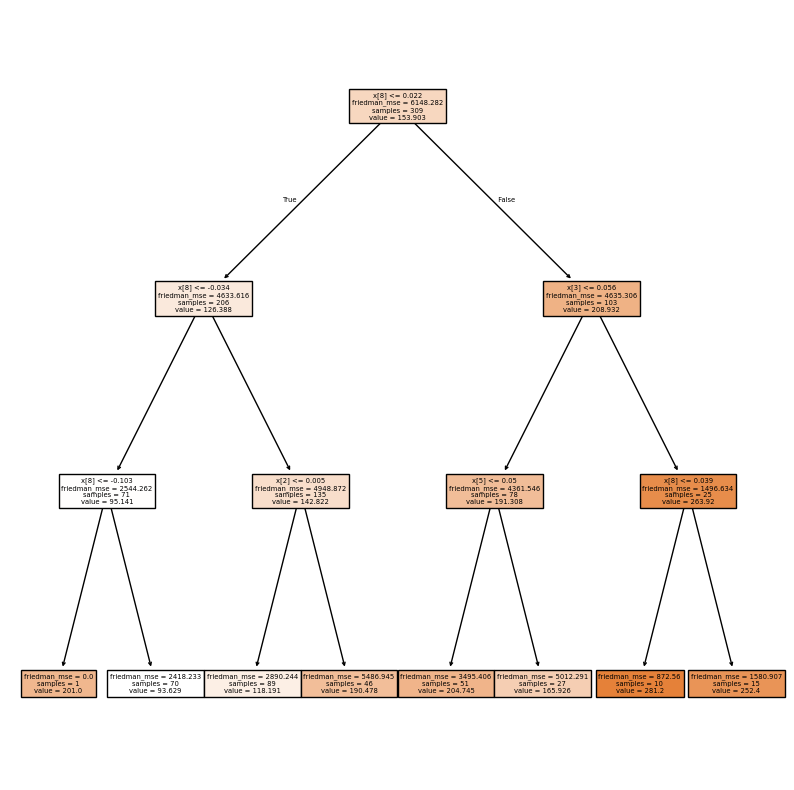

In [21]:
import sklearn.tree as tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(dtreg,filled=True)
plt.show()